In [10]:
import numpy as np
import pandas as pd
from sklearn.cluster import MeanShift
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv("CombinedBooksRandomized.csv")
X = df.loc[:,"Author Average Rating":"Raters"].values

In [24]:
ms = MeanShift()
y = ms.fit_predict(X)
cluster_centers = ms.cluster_centers_

In [26]:
df["cluster"] = y
df

,Title,Author,Author Average Rating,Author Votes,Review Count,Distinct Works,Year,Rating,Raters,Genres,clusster,cluster
0,The Left Hand of Darkness (Paperback),Ursula K. Le Guin,4.07,1258005,85585,753,1969,4.09,155037,"Science Fiction,Fiction,Fantasy,Classics,Scien...",0,0
1,Wish You Were Here (Hardcover),Jodi Picoult,3.99,4447186,273761,82,2021,3.99,153115,"Fiction,Contemporary,Audiobook,Romance,Adult,A...",2,2
2,If I Had Your Face (Hardcover),Frances Cha,3.76,41079,5356,4,2020,3.76,41078,"Fiction,Contemporary,Literary Fiction,Adult,Fe...",0,0
3,I'll Be Gone in the Dark: One Woman's Obsessiv...,Michelle McNamara,4.12,210117,18190,2,2018,4.12,210038,"Nonfiction,Crime,Audiobook,Mystery,Mystery,His...",0,0
4,1984 (Paperback),George Orwell,4.10,8007938,201434,729,1949,4.19,4034352,"Classics,Fiction,Science Fiction,Science Ficti...",4,4
...,...,...,...,...,...,...,...,...,...,...,...,...
1723,The Bear and the Nightingale (The Winternight ...,Katherine Arden,4.23,353862,48530,14,2017,4.10,170787,"Fantasy,Historical,Fiction,Young Adult,Histori...",0,0
1724,Only Superhuman,Christopher L. Bennett,3.87,15137,1503,60,2012,2.86,389,"Science Fiction,Fiction,Comics,Fantasy,Sequent...",0,0
1725,"Delirium (Delirium, #1)",Lauren Oliver,3.88,1385551,106047,51,2011,3.96,452659,"Young Adult,Science Fiction,Romance,Science Fi...",0,0
1726,A Tree Grows in Brooklyn (Paperback),Betty Smith,4.28,448442,25874,15,1943,4.29,434302,"Classics,Fiction,Historical,Young Adult,Young ...",0,0


In [42]:
# predict = ms.predict(y)
from sklearn.metrics import silhouette_score
score = silhouette_score(X,y)
print(score)

0.7042669040293411


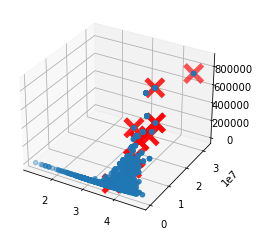

In [43]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], marker='o')
ax.scatter(cluster_centers[:,0], cluster_centers[:,1], 
 cluster_centers[:,2], marker='x', color='red', s=300, linewidth=5,
                                   zorder=10)
plt.show()